# Home assigment 1

Please give your name below:

In [1]:
name='Jens aka the Snowdog'

## Exercise 1

In nature Uranium is commonly available in the form of two isotopes: $^{235}U$ and $^{238}U$. Let us define Uranium enrichment as:

$\begin{equation}
\epsilon= \frac{N_{^{235}U}}{N_{^{235}U}+N_{^{238}U}}
\end{equation}$

where $N$ indicates the number of atoms in a given volume. The half-lives are $4.51 \times 10^9$ and $7.13 \times 10^8$ yr for $^{238}U$ and $^{235}U$, respectively. Today, the natural enrichment is $0.72 \%$, whereas a typical LWR fuel has an enrichment of $2-5 w\%$. It is notable that in the past natural uranium contained enough $^{235}U$ that LWRs could have been built without requiring further enrichment. In fact, evidance shows that cca $1.7 \times 10^9$ yr ago at certain locations such as in Oklo, Gabon the conditions were ideal for the formation of [natural nuclear fission reactors](https://en.wikipedia.org/wiki/Natural_nuclear_fission_reactor). 

- Derive the equation that describes the evolution of the enrichment in time. (hint: use markdown and Latex to document your derivation)
- Define a program function which evaluates the enrichment at a certain time in the past. The function should be able to handle array-like inputs (hint: you can use numpy). 
- Evaluate the function and print the enrichment 
    - at the birth of Earth ($4.5 \times 10^9$ years ago)
    - at the time when the Oklo reactor "operated" ($1.7 \times 10^9$ years ago)
- Plot the enrichment of uranium versus time in the past. Include a vertical line (`plt.axvline`) at the two times highlighted above


### Solution

We can normalize the amount of U-235 and U-238 to the known enrichment: 

$\begin{equation}
    N_{235} = 0.0072 \quad \text{and} \quad N_{238} = 1 - N_{235} = 1 - 0.0072
\end{equation}$

Thus we can write the equation as

$$\epsilon(t) = \frac{N_{235}e^{-\lambda_1 t}}{N_{235}e^{-\lambda_1 t}+(1-N_{235})e^{-\lambda_2 t}}$$

To find the enrichment in the past we can insert negative t-values corresponding to the that point in time


(0.0, 0.25)

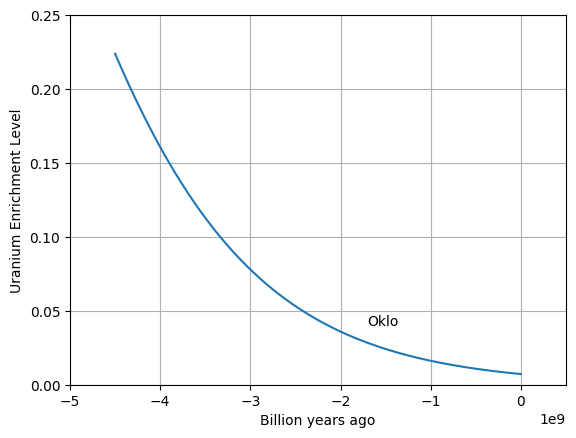

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon(t):
    """Function to evaluate Uranium enrichment at time t. The parameter t can be both float or array."""
    # half-lives
    t235 = 7.13*10**8
    t238 = 4.51*10**9

    d235 = np.log(2)/t235
    d238 = np.log(2)/t238

    a = 0.0072
    Q = a*np.exp(-d235*t) / (a*np.exp(-d235*t) + (1-a)*np.exp(-d238*t))
    return Q

ts = np.linspace(-4.5*10**9,0,1000)
plt.plot(ts, epsilon(ts))
plt.ylabel('Uranium Enrichment Level')
plt.xlabel('Billion years ago')
plt.annotate('Oklo',(-1.7e9,0.04))
plt.grid()
plt.xlim(-5e9,0.5e9)
plt.ylim(0,0.25)